<font color=red size=6>**Bases MC**

<font color=blue>**Las funciones propias solución de la ecuación de Schrödinger para un sistema multielectrónico dependen de las coordenadas de todos los electrones. La aproximación orbital nos permite representar una eigenfunción de muchos electrones en términos de orbitales electrónicos individuales, cada uno de los cuales depende sólo de las coordenadas de un solo electrón. Un ***conjunto de bases*** en este contexto es un conjunto de ***funciones base*** utilizadas para aproximar estos orbitales. Hay dos categorías generales de conjuntos de bases: ***conjuntos de bases mínimas*** que describen sólo los orbitales ocupados y ***conjuntos de bases extendidas*** que describen tanto los orbitales ocupados como los desocupados.**

<font color=green size=5>**En este clase vamos a hacer dos ejercicios para ilustrar la aplicación de las bases**

<font color=green size=4>**Parte A. Cálculo de la energía (HF) de un sistema atómico utilizando un conjunto de bases mínimo?**

1. Necesitamos Importar los módulos necesarios (**psi4** y **numpy**)

2. Definimos un átomo de Boro como un objeto ``psi4.geometry``. Tener en cuenta la multiplicidad de carga y espín. Para un átomo neutro de B. 

3. Configurar las opciones del modulo **psi4** para seleccionar un cálculo **no restringido** (el cálculo restringido *no* funcionará con la configuración electrónica del B).

4. Ejecutar un cálculo **Hartree-Fock** utilizando el conjunto de bases **STO-3G**, guardar tanto la energía como la función de onda. La energía se obtendrá en unidades atómicas. 

5. Observaremos los resultados imprimiéndolos dentro de una celda. Es posible obtener información sobre el conjunto de bases a partir de la funcio ***wfn***. Se puede acceder al número de funciones base con: ``wfn.basiset().nbf()``

***
<font color=brown size=4>**Parte B. Determinar la dependencia de la energía HF de la base escogida**

En Química Computacional, nos enfocamos en dos tipo de bases: Las Funciones Tipo-Slater y las Funciones tipo Gausianas. Su forma más básica puede ser escrita de la siguiente forma. 

$$ \Phi_{gaussian}(r) = 1.0 \cdot e^{-1.0 \cdot x^2} $$

y

$$ \Phi_{slater}(r) = 1.0 \cdot e^{-1.0 \cdot |x|} $$


Podemos fácilmente visualizar estas funciones:

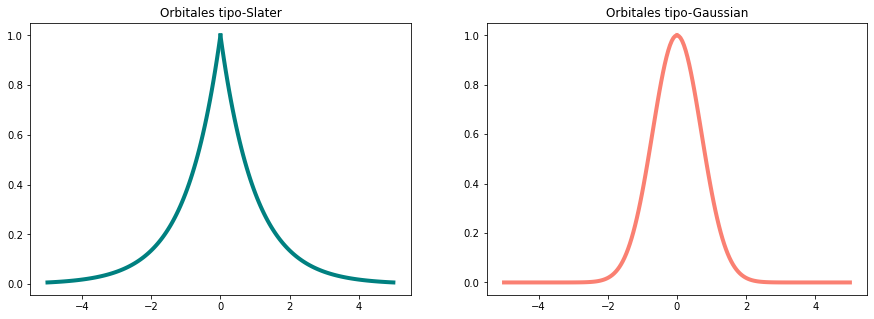

In [1]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0, 5, 100)
sto = 1.0 * np.exp(-np.abs(r))
gto = 1.0 * np.exp(-r**2)

fig, ax = plt.subplots(ncols=2, nrows=1)

p1 = ax[0]
p2 = ax[1]

fig.set_figheight(5)
fig.set_figwidth(15)


p1.plot(r, sto,  lw=4, color="teal")
p1.plot(-r, sto, lw=4, color="teal")

p2.plot(r,  gto, lw=4, color="salmon")
p2.plot(-r, gto, lw=4, color="salmon")


p1.title.set_text("Orbitales tipo-Slater")
p2.title.set_text("Orbitales tipo-Gaussian")

<font color=brown>Los STO se caracterizan por: 1) El pico en el núcleo y 2) el comportamiento lejos del núcleo, que debe tender a cero suavemente. Puedes ver que el GTO no tiene esas características ya que el pico es suave y los extremos van a cero *demasiado* rápido. 
Recordemos que la función propia del estado básico del átomo de hidrógeno con un espín igual a cero tiene la misma forma que el STO. Esto es cierto no sólo para el hidrógeno, sino para cualquier sistema atomístico.  Uno puede preguntarse entonces por qué no usamos la STO en todos los cálculos? La respuesta corta es que no tenemos la solución exacta para cada uno de los sistemas, y cuando se trata de manejar aproximaciones, las GTO son simplemente más eficientes que las STO. ¿Recuerdas el teorema que afirma que el producto de dos gaussianas es también una gaussiana?

<font color=blue>Vamos a utilizar la base más pequeña disponible, el STO-3G, que se aproxima por la suma de *3 funciones gaussianas*.. 

<font color=blue>$$\phi^{STO-3G} = \sum_i^3 d_i \cdot C(\alpha_i) \cdot e^{-\alpha_i|r-R_A|^2}  $$

<font color=blue>donde $\{ \alpha \}_i$ y $\{ d \}_i$ son los exponentes y los coeficientes que definen la base y usualmente son los elementos que necesitamos para crear la base. 

<font color=blue>STO-3G es un ejemplo de una base mínima, representa los orbitales de cada uno de las subcapas ocupadas. Aunque las bases de la forma $STO-nG$ fueron muy populares en los años 1980's, hoy día no son muy utilizadas. De la misma forma que multiples funciones Gaussianas mejoran el comportamiento de los orbitales de Slater, multiples funciones $STO-nG$ son más eficientes para aproximar los orbitales atómicas. En la prática, los electrones de las capas internas (core) son descritas, aún, con funciones $STO-nG$ únicas y solamente los electrones de valencia son expresados como la suma de funciones $STO-nG$. 

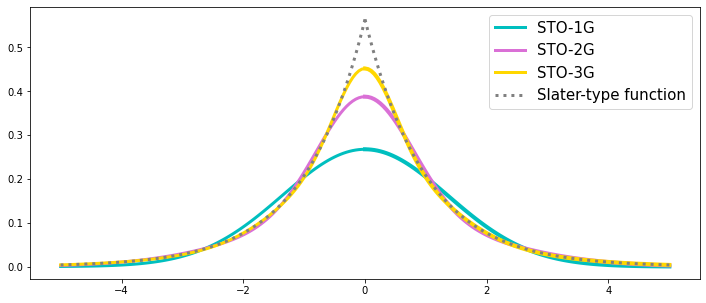

In [4]:
import matplotlib.pyplot as plt

def sto(r, coef, exp):
    return coef * (2*exp/np.pi)**(3/4) * np.exp(-exp*(r)**2)

slater = (1/np.pi)**(0.5) * np.exp(-1.0*np.abs(r))

sto_1g = sto(r, 1.00, 0.270950)
sto_2g = sto(r, 0.67, 0.151623) + sto(r, 0.43, 0.851819)
sto_3g = sto(r, 0.44, 0.109818) + sto(r, 0.53, 0.405771) + sto(r, 0.154, 2.22766)


plt.figure(figsize=(12,5))

plt.plot(r, sto_1g, lw=4, c="c")
plt.plot(-r, sto_1g, label="STO-1G", lw=3,  c="c")

plt.plot(r, sto_2g, lw=4, c="orchid")
plt.plot(-r, sto_2g, label="STO-2G", lw=3, c="orchid")

plt.plot(r, sto_3g, lw=4, c="gold" )
plt.plot(-r, sto_3g, label="STO-3G", lw=3,  c="gold" )

plt.plot(r, slater, ls=":", lw=3, c="grey")
plt.plot(-r, slater, label="Slater-type function", ls=":", lw=3, c="grey")

plt.legend(fontsize=15)
plt.show()

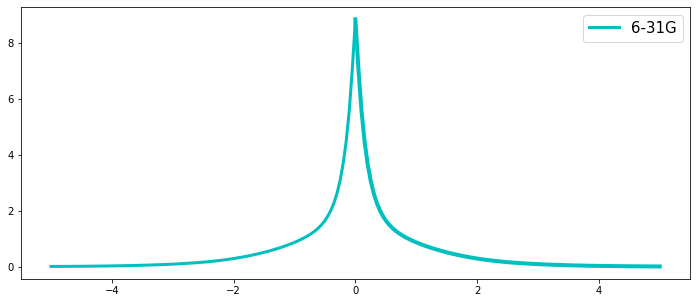

In [2]:
import matplotlib.pyplot as plt

#BASIS "ao basis" PRINT
#BASIS SET: (10s,4p) -> [3s,2p]
#C    S
#      0.3047524880E+04       0.1834737132E-02
#      0.4573695180E+03       0.1403732281E-01
#      0.1039486850E+03       0.6884262226E-01
#      0.2921015530E+02       0.2321844432E+00
#      0.9286662960E+01       0.4679413484E+00
#      0.3163926960E+01       0.3623119853E+00
#C    SP
#      0.7868272350E+01      -0.1193324198E+00       0.6899906659E-01
#      0.1881288540E+01      -0.1608541517E+00       0.3164239610E+00
#      0.5442492580E+00       0.1143456438E+01       0.7443082909E+00
#C    SP
#      0.1687144782E+00       0.1000000000E+01       0.1000000000E+01
#END

def sto(r, coef, exp):
    return coef * (2*exp/np.pi)**(3/4) * np.exp(-exp*(r)**2)

slater = (1/np.pi)**(0.5) *(2*r)* np.exp(-1.0*np.abs(r))

sto_6_31_2s2g = sto(r, 0.1000000000E+01, 0.1687144782E+00)
sto_6_31_2s1g = sto(r, -0.1193324198E+00, 0.7868272350E+01) + sto(r, -0.1608541517E+00, 0.1881288540E+01) + sto(r, 0.1143456438E+01, 0.5442492580E+00)
sto_6_31_1sg = sto(r, 0.1834737132E-02, 0.3047524880E+04) + sto(r, 0.1403732281E-01, 0.4573695180E+03) + sto(r, 0.6884262226E-01, 0.1039486850E+03) + sto(r, 0.2321844432E+00, 0.2921015530E+02) + sto(r, 0.4679413484E+00, 0.9286662960E+01) + sto(r, 0.3623119853E+00, 0.3163926960E+01)
sto_6_31_2p1g = sto(r, 0.6899906659E-01, 0.7868272350E+01) + sto(r, 0.3164239610E+00, 0.1881288540E+01) + sto(r, 0.7443082909E+00, 0.5442492580E+00)
sto_6_31_2p2g = sto(r, 0.1000000000E+01, 0.1687144782E+00)

P_6_31G = sto_6_31_2s2g + sto_6_31_2s1g + sto_6_31_1sg + sto_6_31_2p1g + sto_6_31_2p2g

plt.figure(figsize=(12,5))

plt.plot(r, P_6_31G, lw=4, c="c")
plt.plot(-r, P_6_31G, label="6-31G", lw=3,  c="c")

#plt.plot(r, sto_6_31_2sg, lw=4, c="orchid")
#plt.plot(-r, sto_6_31_2sg, label="STO-2G", lw=3, c="orchid")

#plt.plot(r, sto_6_31g, lw=4, c="gold" )
#plt.plot(-r, sto_6_31g, label="6-31G", lw=3,  c="gold" )

#plt.plot(r, slater, ls=":", lw=3, c="grey")
#plt.plot(-r, slater, label="Slater-type function", ls=":", lw=3, c="grey")

plt.legend(fontsize=15)
plt.show()

In [1]:
>>> # Example: structure optimization of hydrogen molecule
>>> from ase import Atoms
>>> from ase.optimize import BFGS
>>> from ase.calculators.nwchem import NWChem
>>> from ase.io import write
>>> h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, 0.7]])
>>> h2.calc = NWChem(xc='PBE')
>>> opt = BFGS(h2)
opt

In [2]:
from ase import Atoms
from ase.calculators.emt import EMT

atom = Atoms('N')
atom.calc = EMT()
e_atom = atom.get_potential_energy()

d = 1.1
molecule = Atoms('2N', [(0., 0., 0.), (0., 0., d)])
molecule.calc = EMT()
e_molecule = molecule.get_potential_energy()

e_atomization = e_molecule - 2 * e_atom

print('Nitrogen atom energy: %5.2f eV' % e_atom)
print('Nitrogen molecule energy: %5.2f eV' % e_molecule)
print('Atomization energy: %5.2f eV' % -e_atomization)

Nitrogen atom energy:  5.10 eV
Nitrogen molecule energy:  0.44 eV
Atomization energy:  9.76 eV


In [3]:
from ase.calculators.psi4 import Psi4
from ase.build import molecule
import numpy as np

atoms = molecule('H2O')

calc = Psi4(atoms = atoms,
            method = 'b3lyp',
            memory = '500MB', basis = '6-311g')

atoms.calc = calc
print(atoms.get_potential_energy())
print(atoms.get_forces())


  Memory set to 476.837 MiB by Python driver.
  Threads set to 1 by Python driver.

  Memory set to 476.837 MiB by Python driver.
  Threads set to 1 by Python driver.
-2079.3642300257166
[[-5.26195633e-13  1.56470707e-10 -3.15233741e-01]
 [-2.22002671e-14  5.13276073e-01  1.57379102e-01]
 [-1.26481496e-14 -5.13276073e-01  1.57379102e-01]]


Also based on a very helpful basis set overview by C. David Sherrill:  http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf

Neon Atomic Orbitals and Basis Set Exploration

Based on an excellent post by Jacob Martin at:  http://nznano.blogspot.com/2018/03/simple-quantum-chemistry-hartree-fock.html

Also based on a very helpful basis set overview by C. David Sherrill:  http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf